<a href="https://colab.research.google.com/github/sandeepgundeboina/LearningSpark/blob/main/SparkDeltaOptimize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For Re-Run purpose only use the below code else continue from code block 2.

In [ ]:
!rm -rf /content/drive/MyDrive/Abc/Ola_data/new_table

In [ ]:
!pip install delta-spark==2.0.0

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .appName("SparkDeltaOptimize") \
    .config("spark.jars.packages", "io.delta:delta-core_2.12:2.0.0") \
    .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension") \
    .config("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog") \
    .getOrCreate()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.5/281.5 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 kB 14.9 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.2.4-py2.py3-none-any.whl size=282040920 sha256=bdde3ec41ce5b186c83218947287c12ff145ce01a81804ba5ca6e3d5448570aa
  Stored in directory: /root/.cache/pip/wheels/81/6c/a6/af459ed3106da8f1171a265c2982425fe390aa418a47d2a8b4
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7
  Attempting uninstall: pyspark
    Found existing installation: pyspark 3.5.1
    Uninstalling pyspark-3.5.1:
      Successfully uninstalled pyspark-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dataproc-spark-conn

In [ ]:
from delta.tables import *
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [ ]:
spark.sql("create or replace TABLE scd2demo \
(pk1 INT, pk2 STRING, dim1 INT, dim2 INT, dim3 INT,\
 active_status STRING, Start_date TIMESTAMP, end_date TIMESTAMP)\
 USING DELTA\
 LOCATION '/content/drive/MyDrive/Abc/Ola_data/new_table'")

DataFrame[]

In [ ]:
spark.sql("insert into scd2demo values (111,'Unit1',200,500,400,'Y',current_timestamp(),'9999-12-31')")

DataFrame[]

In [ ]:
spark.sql("insert into scd2demo values (121,'Unit2',220,530,405,'Y',current_timestamp(),'9999-12-31')")
spark.sql("insert into scd2demo values (131,'Unit3',250,560,415,'N',current_timestamp(),'9999-12-31')")

DataFrame[]

In [ ]:
spark.sql('select * from scd2demo').show()

+---+-----+----+----+----+-------------+--------------------+-------------------+
|pk1|  pk2|dim1|dim2|dim3|active_status|          Start_date|           end_date|
+---+-----+----+----+----+-------------+--------------------+-------------------+
|121|Unit2| 220| 530| 405|            Y|2025-07-22 16:27:...|9999-12-31 00:00:00|
|111|Unit1| 200| 500| 400|            Y|2025-07-22 16:27:...|9999-12-31 00:00:00|
|131|Unit3| 250| 560| 415|            N|2025-07-22 16:27:...|9999-12-31 00:00:00|
+---+-----+----+----+----+-------------+--------------------+-------------------+



In [ ]:
spark.sql("insert into scd2demo values (151,'Unit4',270,530,405,'Y',current_timestamp(),'9999-12-31')")
spark.sql("insert into scd2demo values (161,'Unit5',256,560,455,'N',current_timestamp(),'9999-12-31')")

DataFrame[]

In [ ]:
spark.sql('select * from scd2demo').show()

+---+-----+----+----+----+-------------+--------------------+-------------------+
|pk1|  pk2|dim1|dim2|dim3|active_status|          Start_date|           end_date|
+---+-----+----+----+----+-------------+--------------------+-------------------+
|121|Unit2| 220| 530| 405|            Y|2025-07-22 16:27:...|9999-12-31 00:00:00|
|111|Unit1| 200| 500| 400|            Y|2025-07-22 16:27:...|9999-12-31 00:00:00|
|151|Unit4| 270| 530| 405|            Y|2025-07-22 16:27:...|9999-12-31 00:00:00|
|161|Unit5| 256| 560| 455|            N|2025-07-22 16:27:...|9999-12-31 00:00:00|
|131|Unit3| 250| 560| 415|            N|2025-07-22 16:27:...|9999-12-31 00:00:00|
+---+-----+----+----+----+-------------+--------------------+-------------------+



In [ ]:
spark.sql("delete from scd2demo where pk1=121")

DataFrame[]

In [ ]:
spark.sql('describe history scd2demo').show()

+-------+-------------------+------+--------+--------------------+--------------------+----+--------+---------+-----------+--------------+-------------+--------------------+------------+--------------------+
|version|          timestamp|userId|userName|           operation| operationParameters| job|notebook|clusterId|readVersion|isolationLevel|isBlindAppend|    operationMetrics|userMetadata|          engineInfo|
+-------+-------------------+------+--------+--------------------+--------------------+----+--------+---------+-----------+--------------+-------------+--------------------+------------+--------------------+
|      6|2025-07-22 16:27:53|  null|    null|              DELETE|{predicate -> ["(...|null|    null|     null|          5|  Serializable|        false|{numRemovedFiles ...|        null|Apache-Spark/3.2....|
|      5|2025-07-22 16:27:42|  null|    null|               WRITE|{mode -> Append, ...|null|    null|     null|          4|  Serializable|         true|{numFiles -> 1, 

In [ ]:
spark.sql("update scd2demo set pk2='Unit2' where pk1=131;")

DataFrame[]

In [ ]:
spark.sql('describe history scd2demo').show()

+-------+-------------------+------+--------+--------------------+--------------------+----+--------+---------+-----------+--------------+-------------+--------------------+------------+--------------------+
|version|          timestamp|userId|userName|           operation| operationParameters| job|notebook|clusterId|readVersion|isolationLevel|isBlindAppend|    operationMetrics|userMetadata|          engineInfo|
+-------+-------------------+------+--------+--------------------+--------------------+----+--------+---------+-----------+--------------+-------------+--------------------+------------+--------------------+
|      7|2025-07-22 16:28:00|  null|    null|              UPDATE|{predicate -> (pk...|null|    null|     null|          6|  Serializable|        false|{numRemovedFiles ...|        null|Apache-Spark/3.2....|
|      6|2025-07-22 16:27:53|  null|    null|              DELETE|{predicate -> ["(...|null|    null|     null|          5|  Serializable|        false|{numRemovedFiles

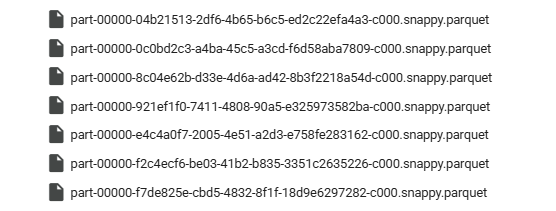

Before performing Optimize

In [ ]:
spark.sql('OPTIMIZE scd2demo').show(truncate=False)

+--------------------------------------------------+--------------------------------------------------------------------------------------------------------------------+
|path                                              |metrics                                                                                                             |
+--------------------------------------------------+--------------------------------------------------------------------------------------------------------------------+
|file:/content/drive/MyDrive/Abc/Ola_data/new_table|{1, 5, {2240, 2240, 2240.0, 1, 2240}, {891, 2179, 1920.6, 5, 9603}, 1, null, 1, 5, 0, false, 0, 0, 1753201691911, 0}|
+--------------------------------------------------+--------------------------------------------------------------------------------------------------------------------+



In [ ]:
!cat /content/drive/MyDrive/Abc/Ola_data/new_table/_delta_log/00000000000000000008.json

{"add":{"path":"part-00000-3aa67732-cc58-4c58-b989-82680dbdbde0-c000.snappy.parquet","partitionValues":{},"size":2240,"modificationTime":1753201688000,"dataChange":false,"stats":"{\"numRecords\":4,\"minValues\":{\"pk1\":111,\"pk2\":\"Unit1\",\"dim1\":200,\"dim2\":500,\"dim3\":400,\"active_status\":\"N\",\"Start_date\":\"2025-07-22T16:27:13.471Z\",\"end_date\":\"9999-12-31T00:00:00.000Z\"},\"maxValues\":{\"pk1\":161,\"pk2\":\"Unit5\",\"dim1\":270,\"dim2\":560,\"dim3\":455,\"active_status\":\"Y\",\"Start_date\":\"2025-07-22T16:27:42.617Z\",\"end_date\":\"9999-12-31T00:00:00.000Z\"},\"nullCount\":{\"pk1\":0,\"pk2\":0,\"dim1\":0,\"dim2\":0,\"dim3\":0,\"active_status\":0,\"Start_date\":0,\"end_date\":0}}"}}
{"remove":{"path":"part-00000-6201d006-06ab-449d-98d2-99dad21f2842-c000.snappy.parquet","deletionTimestamp":1753201686700,"dataChange":false,"extendedFileMetadata":true,"partitionValues":{},"size":891}}
{"remove":{"path":"part-00000-98e15215-183a-4005-a943-584e2e7e474a-c000.snappy.parque

In general, spark engine creates seperate file for each new entry added to the table, which would create more small files, and creates a problem when table is queried, to perform better, Optimize command is used to eliminate several files, in to files of 1GB max data.

From the above json, it can be seen that when we perform optimise, the json is pointing to a newly created file, where it stored the all data of the table. In general Optimise command, compacts all the files in the path to one files max of 1GB, so if there are files more than 1 GB it would create seperate files.

Spark engine will refer to the latest json that is created in order to query the data, and understands that the files that it needs to query to result the output.



In [ ]:
spark.sql('select * from scd2demo').show()

+---+-----+----+----+----+-------------+--------------------+-------------------+
|pk1|  pk2|dim1|dim2|dim3|active_status|          Start_date|           end_date|
+---+-----+----+----+----+-------------+--------------------+-------------------+
|111|Unit1| 200| 500| 400|            Y|2025-07-22 16:27:...|9999-12-31 00:00:00|
|151|Unit4| 270| 530| 405|            Y|2025-07-22 16:27:...|9999-12-31 00:00:00|
|161|Unit5| 256| 560| 455|            N|2025-07-22 16:27:...|9999-12-31 00:00:00|
|131|Unit2| 250| 560| 415|            N|2025-07-22 16:27:...|9999-12-31 00:00:00|
+---+-----+----+----+----+-------------+--------------------+-------------------+



#### VACCUM

Used to clean up the obsolete files, where they are not used, then in order to delete such files, then we can use Vaccum to delete the files from the storage, so that storage can be optimised.

In [ ]:
spark.sql('describe history scd2demo').show()

+-------+-------------------+------+--------+--------------------+--------------------+----+--------+---------+-----------+-----------------+-------------+--------------------+------------+--------------------+
|version|          timestamp|userId|userName|           operation| operationParameters| job|notebook|clusterId|readVersion|   isolationLevel|isBlindAppend|    operationMetrics|userMetadata|          engineInfo|
+-------+-------------------+------+--------+--------------------+--------------------+----+--------+---------+-----------+-----------------+-------------+--------------------+------------+--------------------+
|      8|2025-07-22 16:28:08|  null|    null|            OPTIMIZE|{predicate -> [],...|null|    null|     null|          7|SnapshotIsolation|        false|{numRemovedFiles ...|        null|Apache-Spark/3.2....|
|      7|2025-07-22 16:28:00|  null|    null|              UPDATE|{predicate -> (pk...|null|    null|     null|          6|     Serializable|        false|{

In [ ]:
!ls -lrt /content/drive/MyDrive/Abc/Ola_data/new_table/

total 23
-rw------- 1 root root 2179 Jul 22 16:27 part-00000-5b0441e0-f21f-42c1-b83b-cf89624a6931-c000.snappy.parquet
-rw------- 1 root root 2179 Jul 22 16:27 part-00000-43cc54f1-4213-432d-95d7-dfcc72c23cb7-c000.snappy.parquet
-rw------- 1 root root 2177 Jul 22 16:27 part-00000-b425a318-2f33-4cf0-8814-c7090c300962-c000.snappy.parquet
-rw------- 1 root root 2178 Jul 22 16:27 part-00000-72598f19-d925-4bf6-9cd7-c4e1a40ed9d5-c000.snappy.parquet
-rw------- 1 root root 2178 Jul 22 16:27 part-00000-0f0e0ef5-f933-4305-b270-4eb5768aa6fb-c000.snappy.parquet
-rw------- 1 root root  891 Jul 22 16:27 part-00000-6201d006-06ab-449d-98d2-99dad21f2842-c000.snappy.parquet
-rw------- 1 root root 2177 Jul 22 16:28 part-00000-98e15215-183a-4005-a943-584e2e7e474a-c000.snappy.parquet
-rw------- 1 root root 2240 Jul 22 16:28 part-00000-3aa67732-cc58-4c58-b989-82680dbdbde0-c000.snappy.parquet
drwx------ 2 root root 4096 Jul 22 16:28 _delta_log


In [ ]:
spark.sql("select current_timestamp() - timestamp('2025-07-21 08:15:34')").show(truncate=False)

+-------------------------------------------+
|(current_timestamp() - 2025-07-21 08:15:34)|
+-------------------------------------------+
|INTERVAL '1 08:12:39.823392' DAY TO SECOND |
+-------------------------------------------+



Vacuum can only be used to delete files older than 7 days, i.e., 168 hours.
Even if we try to run by keeping retain period less than 168 hours, it will throw error.

In order to check what files are getting deleted when vacuum command is executed, a small modified code can be executed, i.e.,

spark.sql('vacuum scd2demo dry run').show()

this list the files where the obslete files time stamp is greater than 168 hours and can be deleted.

After doing the dry run, the main code block, \

spark.sql('VACUUM TABLENAME')

this will delete the obselete files threshold greater than 168HRS and should be used carefully.

In [ ]:
#spark.sql('VACUUM scd2demo dry run') -- to get the list of files that will get deleted when vaccum command is run.
#spark.sql('VACUUM scd2demo') -- to delete obselete files from storage
#spark.sql('VACUUM scd2demo reatin 720 HRS dry run') -- to get the list of files, where they are obselete for more than 720HRS ('i.e., 30 Days')
#spark.sql('VACUUM scd2demo reatin 720 HRS') -- deletes all files stored more than 720HRS

####**Z Ordering**

is a technique to optmise large no of small file into a small no of large files, in this technique, first the data is collected and then creates files with max of size 1GB data, the catch is when a query is run, Delta engine consults the deltalog where it has json files which has the data of stats of records that present in file, hence an improvement in performance of the delta engine.

It helps the delta engine to scan less no of files, to provide the output for queries asked by application user.

In [ ]:
spark.sql("update scd2demo set pk2='Unit2' where pk1=151;")
spark.sql("update scd2demo set dim3=549 where pk1=131;")

DataFrame[]

In [ ]:
spark.sql("OPTIMIZE scd2demo ZORDER BY pk1").show(truncate=False)

+--------------------+--------------------+
|                path|             metrics|
+--------------------+--------------------+
|file:/content/dri...|{1, 1, {2274, 227...|
+--------------------+--------------------+



####**END OF CODE**